<a href="https://colab.research.google.com/github/Leomutz/NIDS1/blob/main/2024_27November_tuning_hyperparameters_CNN_MNIST_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- CNNs are the best in classifying images like facial recognition, self driving cars, detecting objects etc
- We can design a simple 2D CNN model by using keras with tensorflow for digit recognition by using MNIST dataset

**Steps to follow**
1. Data preparation
2. Implementing the model and compiling it
3. Training and evaluation the model
4. Save the model

In [ ]:
# MNIST dataset has 60000 training images and 10000 testing images
# image size of 28x28

# import libaries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


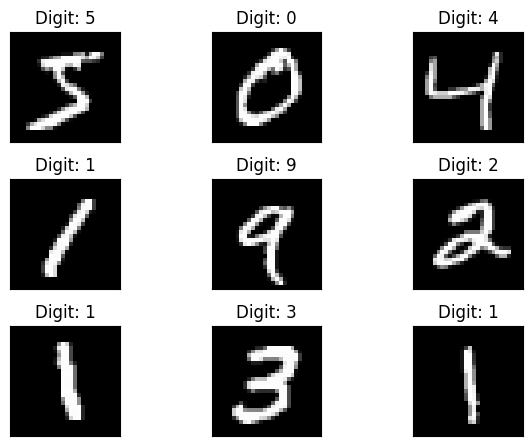

In [ ]:
# we can visualize training data

import matplotlib.pyplot as plt

#fig = plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title('Digit: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# we need to preprocess the image data

# reshaping
# this assumes our data format
# for 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while
# "channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3)
'''
if k.image_data_format()  == "channels_first":
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
'''
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [ ]:
# label data need to be converted into categorical formats like '3' need to be
# [0,0,0,1,0,0,0,0,0,0]

# set number of categories
num_cat = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_cat)
y_test = keras.utils.to_categorical(y_test, num_cat)

In [ ]:
print(y_train[0:5])
print('\n',y_test[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


- when implementing and compiling the model we need to define the model's architecture
- using optimizer function, loss function and performance metrics

# Architecture of CNN
- 2 convolution layers followed by pooling layer, a full connected layer and softmax layer respectively
- multiple filters are used at each convolution layer, for different type of feature extraction
- after both maxpooling and fully connected layer, dropout is introduced as regularization to reduce the over-fitting problem

**Compile the model**
- we can use *categorical_crossentropy* loss function as it is a multi-class classification problem.
- all the labels carry similar weight, better to use accuracy as performance metric
- gradient descent approach called AdaDelta is used for optimization of the model parameters, the results is not good. We can try Adam optimizer.

**Training and evaluating the model**
- we need to train the model after defining the architecture and compiling it.
- thus we need to fit the model with training data (X_train and y_train)

In [ ]:
# implementing the model
model = Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3,3), activation='relu'))

# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# randomly tunr neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions
# we want a classification output
model.add(Flatten())
# fully connetced to get all relevant data
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(num_cat, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# fitting the model with training data
batch_size = 2000
num_epoch = 5
model_log = model.fit(X_train, y_train, batch_size=batch_size,
                      epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 192s 6s/step - accuracy: 0.9868 - loss: 0.0449 - val_accuracy: 0.9886 - val_loss: 0.0311
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 179s 6s/step - accuracy: 0.9871 - loss: 0.0439 - val_accuracy: 0.9893 - val_loss: 0.0305
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9895 - val_loss: 0.0293
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.9884 - loss: 0.0398 - val_accuracy: 0.9896 - val_loss: 0.0297
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.9888 - loss: 0.0377 - val_accuracy: 0.9898 - val_loss: 0.0288


In [ ]:
# evaluate the model in terms of performance
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028827637434005737
Test accuracy: 0.989799976348877


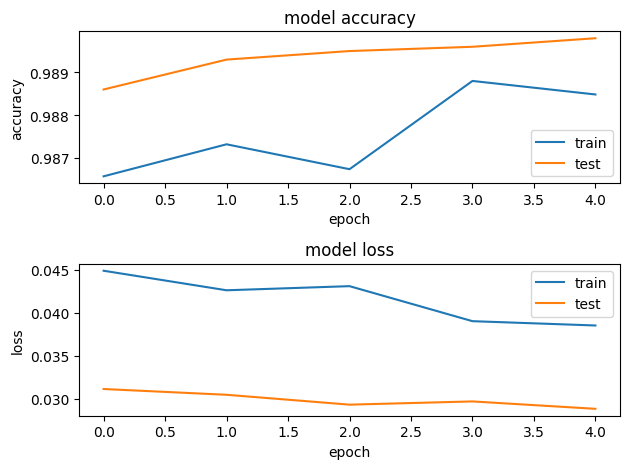

In [ ]:
# we can visualize the whole training log,
# with more epochs the loss and accuracy of the model on training and testing data
# converges thus making the stable model

import os

# plotting the metrics
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1, 2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


# Model saving
- the trained model needs to be serialized
- the structure (architecture) of the model can be stored in a *json* file
- the weights of the model can be stored in *hdf5* file format

Reference:
https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

In [ ]:
# serialize the model to JSON
model_digit_json = model.to_json()
with open('/content/Saving_models/model_digit.json', 'w') as json_file:
  json_file.write(model_digit_json)

# serialize weights to HDF5
model.save_weights('/content/Saving_models/model_digit.weights.h5')
print('Saved model to disk')

Saved model to disk


### Hyperparameter tuning

https://pyimagesearch.com/2021/05/31/hyperparameter-tuning-for-deep-learning-with-scikit-learn-keras-and-tensorflow/

In [7]:
# importing needed packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam


In [4]:
def get_mlp_model(hiddenLayerOne=784, hiddenLayerTwo=256,
                  dropout=0.2, learnRate=0.01):
  # initialize a sequential model and add flatten
  model = Sequential()
  model.add(Flatten())

  # build a model architecture

  # add two stacks of fully connected layer->ReLU->Dropout
  model.add(Dense(hiddenLayerOne, activation='relu', input_shape=(784,)))
  model.add(Dropout(dropout))
  model.add(Dense(hiddenLayerTwo, activation='relu'))
  model.add(Dropout(dropout))

  model.add(Dense(10, activation='softmax'))

  # compile
  model.compile(optimizer=Adam(learning_rate=learnRate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [5]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.datasets import mnist

In [6]:
# load the MNIST dataset
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# scale data to the range of [0,1]
trainData = trainData.astype('float32') / 255.0
testData = testData.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
model = get_mlp_model()

# train the network
print('[Info] training model...')
H = model.fit(x=trainData, y=trainLabels, validation_data=(testData, testLabels),
              batch_size=8, epochs=5)

# make predictions on the test set and evaluate
print('[Info] evaluating network...')
accuracy = model.evaluate(testData, testLabels)[1]
print('accuracy: {:.2f}%'.format(accuracy*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[Info] training model...
Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 63s 8ms/step - accuracy: 0.7809 - loss: 0.8776 - val_accuracy: 0.9039 - val_loss: 0.3742
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 92s 9ms/step - accuracy: 0.8379 - loss: 0.6898 - val_accuracy: 0.8886 - val_loss: 0.4180
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - accuracy: 0.8506 - loss: 0.6374 - val_accuracy: 0.9042 - val_loss: 0.3602
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.8488 - loss: 0.6618 - val_accuracy: 0.9122 - val_loss: 0.4701
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - accuracy: 0.8528 - loss: 0.6560 - val_accuracy: 0.9270 - val_loss: 0.3941
[Info] evaluating network...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9191 - loss: 0.4339
accuracy: 92.70%


In [8]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

In [1]:
# now implementing hyperparameter tuning

# random seed for reproducibility
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.datasets import mnist

In [2]:
 #load the MNIST dataset
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# scale data to the range of [0,1]
trainData = trainData.astype('float32') / 255.0
testData = testData.astype('float32') / 255.0

- we need to construct the KerasClassifier object to build a model
- then tune the hyperparameters with RandomizedSearchCV

In [5]:
print('[INFO] initializing model...')
model = KerasClassifier(build_fn=get_mlp_model, verbose=0)

# define grid of hyperparameter
hiddenLayerOne = [256, 784]
hiddenLayerTwo = [128, 256]
learnRate = [1e-2, 1e-3]
dropout = [0.3, 0.4]
batchSize = [32, 64]
epochs = [2, 3]

# dictionary from the hyperparameter grid
grid = dict(
    hiddenLayerOne=hiddenLayerOne,
    learnRate=learnRate,
    hiddenLayerTwo=hiddenLayerTwo,
    dropout=dropout,
    batch_size=batchSize,
    epochs=epochs
)

[INFO] initializing model...


<ipython-input-5-40ee31057971>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=get_mlp_model, verbose=0)


RandomizedSearchCV()
- estimator=model : pass in the model
- n_jobs=-1 : tells scikit-learn to use all cores/processors on the machine
- cv=3 : number of cross-validation folds
- param_distributions=grid : pass hyperparameters
- scoring='accuracy' : the metric we want to monitor
- searcher.fit() : starts tuning process
- best_score_ and best_params_ : found during the search
- best_estimator_ : give the best model
- evaluate the model by best parameters found

In [8]:
# random search with k-fold cross-validation
print('[INFO] performing random search...')
searcher = RandomizedSearchCV(estimator=model, n_jobs=-1, cv=2,
                              param_distributions=grid,
                              scoring='accuracy')
search_results = searcher.fit(trainData, trainLabels)

[INFO] performing random search...


In [9]:
# summarize grid search information
bestScore = search_results.best_score_
bestParams = search_results.best_params_

print('[INFO] best score is {:.2f} using {}'.format(bestScore, bestParams))

[INFO] best score is 0.96 using {'learnRate': 0.001, 'hiddenLayerTwo': 128, 'hiddenLayerOne': 256, 'epochs': 3, 'dropout': 0.3, 'batch_size': 64}


###  hello